# Data Analysis for Software Engineers

## Practical Assignment 2
## Decision trees

<hr\>
**General Information**

**Due date:** 17 February 2018, 23:59 <br\>
**Submission link:** [here](https://www.dropbox.com/request/HLKn1AOAohYOCgu6NG6i)

**Kupriyanov Kirill, BSE 151**<br\>
<hr\>

Take in to account that some tasks may not have rigorous and comprehensive solution.<br\>
Support your code with comments and illustation if needed. The more conclusions, derivations and explanations you provide - the better. <br\>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.mstats import mquantiles
from sklearn.base import BaseEstimator, ClassifierMixin

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Decision Tree implementation (4 points + 1 bonus)

To complete this task you have to implement decision tree algorithm for classification task. Key features:
* Sklearn estimator interface (`fit`, `predict` and `predict_proba` methods)
* During threshold seach implement exastive and histogram-based approaches
    * In exastive approach all intermediate values of features are considered as candidates for threshold
    * In histogram-based approach you consider only borders of histogram, say, with 20 bins (see `numpy.percentile()`)
* Structural hyperparameters: `max_depth` and `min_samples_leaf`. You can implement more if you wish
* Impurity functions: Gini, Classification error, Entropy
* Tree visualization: method to convert your tree to .dot format for graphvis and plot it
* Featuer importances (1 bonus point)

Врееееееееееееееееееееееееееееемяяяяяяя..

Сделал только частично.

In [2]:
class Tree:
    pass


class Leaf(Tree):
    def __init__(self, label):
        self.label = label

        
class Node(Tree):
    def __init__(self,feature, threshold, left, right):
        self.left = left
        self.right = right
        self.feature = feature
        self.threshold = threshold

In [3]:
example_tree = Node(1, -3, Node(3, 10, Leaf(2), Leaf(1)), Leaf(3))

In [4]:
print(example_tree.threshold)
print(example_tree.left.threshold)
print('---')
print(example_tree.left.left.label)
print(example_tree.left.right.label)

-3
10
---
2
1


In [5]:
class TreeBuilder:
    def build(self, X, y, criterion):
#         print(X)
#         print(y)
        if len(X) == 0 and len(y) == 0:
            return
        if np.all(y == y[0]):
            return Leaf(y[0])

        attribute, threshold = self.best_split(X, y, criterion)

        left_child = self.build(X[X[:, attribute] < threshold],
                                y[X[:, attribute] < threshold],
                                criterion)

        right_child = self.build(X[X[:, attribute] >= threshold],
                                 y[X[:, attribute] >= threshold],
                                 criterion)
    

        return Node(attribute, threshold, left_child, right_child)

    def best_split(self, X, y, criterion='gini'):
        best_attribute = -1
        best_threshold = - 1
        best_impurity_loss = 1
        for attribute in range(X.shape[1]):
            possible_thresholds = np.unique(X[:, attribute])[1:]
            for threshold in possible_thresholds:
                if criterion is 'gini':
                    current_impurity_loss = self.gini(X, y, attribute, threshold)
                elif criterion is 'entropy':
                    current_impurity_loss = self.entropy(X, y, attribute, threshold)
                else:
                    raise ValueError(
                        '{} is not a valid criterion'.format(criterion))
                if current_impurity_loss < best_impurity_loss:
                    best_attribute = attribute
                    best_threshold = threshold
                    best_impurity_loss = current_impurity_loss

        return best_attribute, best_threshold

    def gini(self, X, y, attribute, threshold):
        masks = (X[:, attribute] < threshold, X[:, attribute] >= threshold)
        gini_sum = 0
        for mask in masks:
            counts = np.unique(y[mask], return_counts=True)[1]
            proportions = counts / len(y[mask])
            gini_impurity = 1 - np.dot(proportions, proportions)
            gini_weight = len(y[mask]) / len(y)
            gini_sum += gini_weight * gini_impurity
        return gini_sum

    def entropy(self, X, y, attribute, threshold):
        masks = (X[:, attribute] < threshold, X[:, attribute] >= threshold)
        entropy_sum = 0
        for mask in masks:
            counts = np.unique(y[mask], return_counts=True)[1]
            proportions = counts / len(y[mask])
            conditional_entropy = -np.dot(proportions, np.log2(proportions))
            entropy_weight = len(y[mask]) / len(y)
            entropy_sum += entropy_weight * conditional_entropy
        return entropy_sum

In [6]:
class TreeClassifier(TreeBuilder):
    def __init__(self):
        self.tree_ = None
        self.X_train = None
        self.y_train = None

    def fit(self, X, y, criterion='gini'):
        self.X_train = X
        self.y_train = y
        self.tree_ = self.build(X, y, criterion)

    def predict(self, X):
        predictions = []
        for i in range(len(self.y_train)):
            predictions.append('')
        predictions = np.array(predictions)
        
        for i in range(len(X)):
            cursor = self.tree_
            while isinstance(cursor, Node):
                if X[i, cursor.feature] < cursor.threshold:
                    cursor = cursor.left
                else:
                    cursor = cursor.right
            if cursor != None:
                predictions[i] = cursor.label
        return predictions

In [7]:
clf = TreeClassifier()

# Checking on simple datasets (1 point)

Let's check your decision tree on some basic datasets.

For each dataset output tree visualization and decision boundary

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

RND_SEED = 4118956

In [10]:
def get_circles():
    return make_circles(n_samples=1000, shuffle=True, noise=0.1, factor=0.2, random_state=RND_SEED)


def get_moons():
    return make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=RND_SEED)


def get_blobs():
    return make_blobs(n_samples=1000, n_features=2, centers=3, shuffle=True, cluster_std=0.9, random_state=RND_SEED)


def plot_decision_boundary(model, X, y):
    fig = plt.figure()
    X1min, X2min = X.min(axis=0)
    X1max, X2max = X.max(axis=0)
    x1, x2 = np.meshgrid(np.linspace(X1min, X1max, 500),
                         np.linspace(X2min, X2max, 500))
    ypred = model.predict(np.c_[x1.ravel(), x2.ravel()])
    ypred = ypred.reshape(x1.shape)
    
    plt.contourf(x1, x2, ypred, alpha=.4)
    plt.scatter(X[:,0], X[:,1], c=y)

## Circles

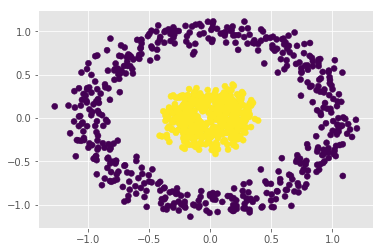

In [11]:
X, y = get_circles()
plt.scatter(X[:, 0], X[:, 1], c=y)

In [12]:
model = TreeClassifier()
model.fit(X, y)

In [13]:
model.tree_.right.feature

0

---
Ну, вот и всё. Да, это очень грустно..

In [ ]:
plot_decision_boundary(model, X, y)

In [ ]:
model.plot_tree()

## Moons

In [ ]:
X, y = get_moons()
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
model = MyDecisionTree(someparams).fit(X, y)

In [ ]:
plot_decision_boundary(model, X, y)

In [ ]:
model.plot_tree()

## Blobs

In [ ]:
X, y = get_blobs()
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
model = MyDecisionTree(someparams).fit(X, y)

In [ ]:
plot_decision_boundary(model, X, y)

In [ ]:
model.plot_tree()

# Training speed calculation (1 point)

In [ ]:
from sklearn.datasets import make_classification
from time import time

Use `make_classification` function to generate datasets. Run the following experiments on trees with maximum depth:
* Run decision tree algorithm for datasets with $N \in \{100, 500, 1000, 2000, 5000, 10000, 30000\}$ and $D=20$ features. Plot time (in sec) for each $N$
    * Compare exact and histogram theshold estimation
    
    
* Run decision tree algorithm for datasets with $N=1000$ and $D \in \{5, 10, 20, 50, 100, 200, 500\}$ features. Plot time (in sec) for each $D$
    * Compare exact and histogram theshold estimation

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, random_state=RND_SEED)

t1 = time()
model = MyDecisionTree(splitter='exact').fit(X, y)
t2 = time()

print('{} seconds passed'.format(t2 - t1))

# Real Dataset (4 points)

#### Data preparation

In this part of the task you should predict whether income of a person exceeds 50K.
1. Load the data from `adult_data_small.csv`
2. Prepare the data for a classification algorithm: use one-hot encoding for categorical features, encode binary features and target feature "salary".
3. Split the data into random train and test subsets in proportion 70:30. Don't forget to use random state

In [ ]:
def preproc_dataset(df_input):
    df_preproc = df_input.copy()
    
    # Fill in
    
    return df_preproc

#### Hyperparameter selection

What would be the accuracy of the algorithm, which predicts only majority class on test set?

Use training set for hyperparameter selection
* You should use implemented algorithm
* Perform grid-search of `max_depth` and `min_samples_leaf` with Stratified 5-Fold cross-validation. Don't forget to use `random_state`!
* Use "accuracy" as main quality measure
* Pick the best hyperparameter setting

* Which features turned out to be the most important?
    * If you did not implement feature importance try looking at tree visualization

* Apply the best model to test set and calculate accuracy
* Compare it with accuracy during cross-validation